In [1]:
%pwd

'/content'

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/depression analysis

/content/drive/MyDrive/Colab Notebooks/depression analysis


In [3]:
%ls

depression.csv  training.ipynb  Untitled0.ipynb


In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [164]:
import tensorflow
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [7]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [8]:
dataset=pd.read_csv('depression.csv')

In [9]:
dataset.head(10)

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
5,i m year old turning soon in a few month i liv...,1
6,i live alone and despite me being prone to lon...,1
7,i m not looking for sympathy just simply to st...,1
8,i don t know how to communicate all of my thou...,1
9,mom i m sad it hurt in my heart the feeling fa...,1


In [10]:
dataset.rename(columns={'is_depression':'label','clean_text':'text'},inplace=True)

In [11]:
dataset.head(10)

,text,label
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
5,i m year old turning soon in a few month i liv...,1
6,i live alone and despite me being prone to lon...,1
7,i m not looking for sympathy just simply to st...,1
8,i don t know how to communicate all of my thou...,1
9,mom i m sad it hurt in my heart the feeling fa...,1


<Axes: >

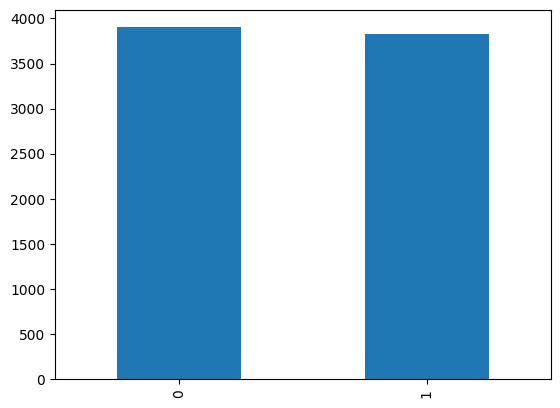

In [12]:
dataset["label"].value_counts().plot(kind="bar")

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7731 non-null   object
 1   label   7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [14]:
dataset.describe()

,label
count,7731.000000
mean,0.495537
std,0.500012
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [15]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [16]:
len(dataset)

7731

In [17]:
lemmatizer=WordNetLemmatizer()

In [18]:
def lemmitization(sentence):
  sentence=re.sub('[^a-zA-Z]', ' ',sentence)
  sentence=sentence.lower()
  sentence=sentence.split()
  sentence=[lemmatizer.lemmatize(word) for word in sentence if not word in set(stopwords.words("english"))]
  sentence=" ".join(sentence)
  return sentence

In [19]:
dataset.head(5)

,text,label
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [20]:
dataset["text"]=dataset["text"].apply(lemmitization)

In [21]:
dataset.head(5)

,text,label
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


In [67]:
unique_voc=set()
for sentence in dataset["text"]:
  words=sentence.split()
  for word in words:
    unique_voc.add(word)
voc_size=len(unique_voc)

In [180]:
def embedded_operation(data):
  onehot_rep=[one_hot(words,voc_size)for words in data]
  maximum=1844
  for rep in onehot_rep:
    maximum=max(len(rep),maximum)
  embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=maximum)
  return embedded_docs,maximum


In [190]:
X,maximum=embedded_operation(dataset["text"])

In [191]:
X

array([[    0,     0,     0, ..., 11503,  4777, 16704],
       [    0,     0,     0, ..., 18411, 13368,  3766],
       [    0,     0,     0, ...,   584,   992,  1124],
       ...,
       [    0,     0,     0, ...,  4369, 10551, 15130],
       [    0,     0,     0, ...,  2255, 12662,  3390],
       [    0,     0,     0, ..., 14895,  2513, 13739]], dtype=int32)

In [206]:
embedding_vector_features=maximum*2
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=maximum))
model.add((LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1844, 3688)        68637368  
                                                                 
 lstm_5 (LSTM)               (None, 100)               1515600   
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 70,153,069
Trainable params: 70,153,069
Non-trainable params: 0
_________________________________________________________________
None


In [207]:
Y=dataset["label"]

In [208]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10,stratify=Y)

In [209]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(6184, 1844) (6184,) (1547, 1844) (1547,)


In [210]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=16)

Epoch 1/5
387/387 [==============================] - 92s 232ms/step - loss: 0.1391 - accuracy: 0.9510 - val_loss: 0.0964 - val_accuracy: 0.9657
Epoch 2/5
387/387 [==============================] - 78s 200ms/step - loss: 0.0403 - accuracy: 0.9845 - val_loss: 0.0985 - val_accuracy: 0.9690
Epoch 3/5
387/387 [==============================] - 72s 186ms/step - loss: 0.0068 - accuracy: 0.9974 - val_loss: 0.1985 - val_accuracy: 0.9515
Epoch 4/5
387/387 [==============================] - 70s 182ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1841 - val_accuracy: 0.9573
Epoch 5/5
387/387 [==============================] - 70s 180ms/step - loss: 4.0860e-04 - accuracy: 1.0000 - val_loss: 0.2101 - val_accuracy: 0.9573


In [211]:
Y_pred=model.predict(X_test)

49/49 [==============================] - 5s 88ms/step


In [212]:
Y_pred=(Y_pred>=0.5).astype("int")

In [213]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       780
           1       0.95      0.96      0.96       767

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547



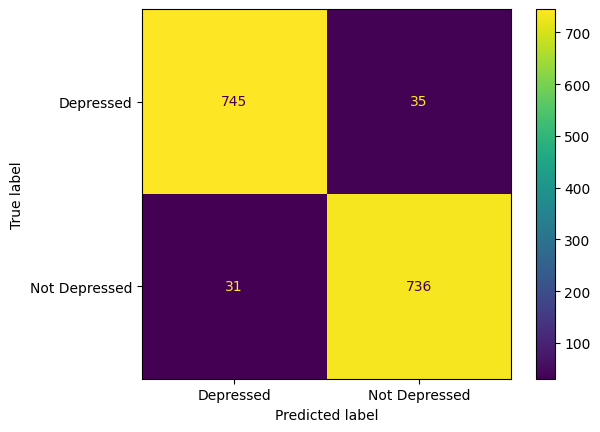

In [214]:
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Depressed", "Not Depressed"])
cm_display.plot()
plt.show()

In [216]:
def pre_process_text(sentence):
  sentence=lemmitization(sentence)
  test_embd,maximum=embedded_operation([sentence])
  return test_embd

In [217]:
def sentiment_analysis(sentence):
  test_embd=pre_process_text(sentence)
  model = tensorflow.keras.models.load_model('depression_analysis_model.keras')
  predict=model.predict(test_embd)
  predict=(predict>=0.5).astype("int")
  if predict[0][0]==1:
    print("The sentence sounds like a depressed sentence")
  else:
    print("This is a normal sentence")

In [220]:
sentiment_analysis("help me")

1/1 [==============================] - 1s 545ms/step
The sentence sounds like a depressed sentence


In [215]:
model.save('depression_analysis_model.keras')